**Loading Libraries and Data**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_excel("C:/Users/kosti/OneDrive/Desktop/UMICH/SI/SI 671/Project/HS861M 2010-.xlsx")
df.head()

,Year,Month,State,Data Status,Residential Revenue,Residential Sales,Residential Customers Count,Residential Price,Commerical Revenue,Commercial Sales,...,Industrial Customers Count,Industrial Price,Transportation Revenue,Transportation Sales,Transportation Customers Count,Transportation Price,Total Revenues,Total Sales,Total Customer Count,Total Price
0,2024,8.0,AK,Preliminary,41455.79,147071.1,300921.0,28.19,54151.16,213280.75,...,1227.0,20.47,0.00,0.00,0.0,0.00,119020.26,474728.62,359966.0,25.07
1,2024,8.0,AL,Preliminary,544246.42,3659605.8,2410796.0,14.87,317586.85,2370372.90,...,7245.0,7.29,0.00,0.00,0.0,0.00,1071200.10,8900082.90,2806041.0,12.04
2,2024,8.0,AR,Preliminary,253567.70,2032838.5,1488194.0,12.47,123643.54,1226540.50,...,41846.0,6.95,3.77,27.62,2.0,13.63,505260.10,5102315.30,1739731.0,9.90
3,2024,8.0,AZ,Preliminary,784064.00,5278946.4,3103761.0,14.85,486932.56,3822927.50,...,7080.0,9.24,109.80,959.96,2.0,11.44,1385900.70,10344991.00,3457837.0,13.40
4,2024,8.0,CA,Preliminary,3125289.80,10064788.0,14325972.0,31.05,3196792.20,11053106.00,...,150875.0,24.93,10544.65,60920.46,13.0,17.31,7415250.00,25520629.00,16270648.0,29.06


**Cleaning Data**

In [90]:
# The issue is caused by a row with a text note instead of numerical year and month values. We'll remove rows where 'Year' or 'Month' have non-numeric data.

# Removing rows where 'Year' or 'Month' columns contain non-numeric data
data_monthly_states_cleaned = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]
data_monthly_states_cleaned = data_monthly_states_cleaned[pd.to_numeric(data_monthly_states_cleaned['Month'], errors='coerce').notnull()]

# Convert 'Year' and 'Month' columns to integer to prepare for combining them into a date
data_monthly_states_cleaned['Year'] = data_monthly_states_cleaned['Year'].astype(int)
data_monthly_states_cleaned['Month'] = data_monthly_states_cleaned['Month'].astype(int)

# Combining 'Year' and 'Month' into a single 'Date' column
data_monthly_states_cleaned['Date'] = pd.to_datetime(data_monthly_states_cleaned[['Year', 'Month']].assign(DAY=1))

# Displaying the first few rows of the cleaned data to verify
data_monthly_states_cleaned.head()

df = data_monthly_states_cleaned


In [91]:
df.sample(5)

,Year,Month,State,Data Status,Residential Revenue,Residential Sales,Residential Customers Count,Residential Price,Commerical Revenue,Commercial Sales,...,Industrial Price,Transportation Revenue,Transportation Sales,Transportation Customers Count,Transportation Price,Total Revenues,Total Sales,Total Customer Count,Total Price,Date
6961,2013,4,MS,Final,135744.88,1204629.70,1259642.0,11.27,107034.95,1037493.70,...,5.97,0.0,0.0,0.0,0.00,322027.53,3569023.1,1494773.0,9.02,2013-04-01
6884,2013,6,WY,Final,18271.74,170033.46,263243.0,10.75,26871.59,307009.73,...,6.40,0.0,0.0,0.0,0.00,102141.32,1368127.4,331203.0,7.47,2013-06-01
8664,2010,7,VA,Final,551977.00,5094800.00,3306395.0,10.83,356426.00,4633121.00,...,6.89,1101.0,15178.0,1.0,7.25,1020443.00,11352424.0,3738811.0,8.99,2010-07-01
8948,2010,1,MN,Final,232552.00,2403567.00,2292252.0,9.68,147882.00,1924860.00,...,6.20,139.0,1799.0,1.0,7.73,488452.00,6069563.0,2575474.0,8.05,2010-01-01
7497,2012,5,AK,Final,27587.00,149709.00,273764.0,18.43,34019.00,222973.00,...,17.57,0.0,0.0,0.0,0.00,80572.00,480610.0,323795.0,16.76,2012-05-01


In [92]:
monthly_states_df = df

# Focusing on Total Revenues, Total Sales, Total Price by State and Date
selected_columns = ['Date', 'State', 'Total Revenues', 'Total Sales', 'Total Price']
data_for_clustering = monthly_states_df[selected_columns]

# Pivot the data to create a time series for each state
pivoted_data = data_for_clustering.pivot(index='Date', columns='State', values=['Total Revenues', 'Total Sales', 'Total Price'])

# Fill any missing values with forward-fill (interpolation can be considered too)
pivoted_data = pivoted_data.ffill().bfill()

# Normalize data (Min-Max Scaling per state)
normalized_data = (pivoted_data - pivoted_data.min()) / (pivoted_data.max() - pivoted_data.min())

# Check the structure of the normalized dataset
normalized_data.head()

Total Revenues                                                    \
State                  AK        AL        AR        AZ        CA        CO   
Date                                                                          
2010-01-01       0.267859  0.297272  0.277429  0.042847  0.042916  0.076109   
2010-02-01       0.137219  0.166028  0.193133  0.000000  0.000000  0.000000   
2010-03-01       0.158495  0.110319  0.121992  0.018637  0.052148  0.033426   
2010-04-01       0.084969  0.046630  0.027853  0.020927  0.024756  0.040016   
2010-05-01       0.046596  0.170241  0.069518  0.146394  0.028095  0.074441   

                                                    ... Total Price            \
State             CT        DC        DE        FL  ...          SD        TN   
Date                                                ...                         
2010-01-01  0.461411  0.494176  0.574427  0.074142  ...    0.000000  0.010142   
2010-02-01  0.274332  0.418247  0.416373  0.132879  ...    0.045455  0.000000   
2010-03-01  0.259047  0.331532  0.383962  0.102808  ...    0.061364  0.040568   
2010-04-01  0.167139  0.292921  0.198213  0.024818  ...    0.111364  0.119675   
2010-05-01  0.116700  0.473940  0.173332  0.158096  ...    0.190909  0.160243   

                                                                        \
State             TX        UT        VA        VT        WA        WI   
Date                                                                     
2010-01-01  0.307692  0.052770  0.197222  0.000000  0.068783  0.034568   
2010-02-01  0.320879  0.052770  0.225000  0.029520  0.074074  0.051852   
2010-03-01  0.296703  0.100264  0.127778  0.046125  0.058201  0.029630   
2010-04-01  0.287912  0.134565  0.122222  0.020295  0.042328  0.000000   
2010-05-01  0.279121  0.229551  0.133333  0.038745  0.026455  0.044444   

                                
State             WV        WY  
Date                            
2010-01-01  0.032020  0.018182  
2010-02-01  0.046798  0.038961  
2010-03-01  0.032020  0.059740  
2010-04-01  0.022167  0.000000  
2010-05-01  0.022167  0.023377  

[5 rows x 153 columns]

In [93]:
# Identify rows where 'Year' or 'Month' contains non-numeric data
non_numeric_rows = monthly_states_df[
    ~monthly_states_df['Year'].apply(lambda x: str(x).isdigit()) | 
    ~monthly_states_df['Month'].apply(lambda x: str(x).isdigit())
]

# Display the problematic rows to understand their structure
non_numeric_rows

,Year,Month,State,Data Status,Residential Revenue,Residential Sales,Residential Customers Count,Residential Price,Commerical Revenue,Commercial Sales,...,Industrial Price,Transportation Revenue,Transportation Sales,Transportation Customers Count,Transportation Price,Total Revenues,Total Sales,Total Customer Count,Total Price,Date


**Similariy Measures**

**Eucledian Distance**

In [94]:
import pandas as pd
from scipy.spatial.distance import euclidean
import numpy as np

def calc_euclidean_dist(data):
    # Get the list of countries (columns)
    countries = data.columns

    # Initialize an empty dataframe to store pairwise distances
    dist_matrix = pd.DataFrame(np.zeros((len(countries), len(countries))), 
                               index=countries, 
                               columns=countries)
    
    # Calculate pairwise Euclidean distance
    for i in range(len(countries)):
        for j in range(i, len(countries)):
            sum_sq_diff = np.sum((data[countries[i]] - data[countries[j]])**2)
            dist = np.sqrt(sum_sq_diff)
            dist_matrix.iloc[i, j] = dist
            dist_matrix.iloc[j, i] = dist

    return dist_matrix


In [95]:
calc_euclidean_dist(pivoted_data)

Total Revenues                                            \
State                            AK            AL            AR            AZ   
               State                                                            
Total Revenues AK      0.000000e+00  8.472336e+06  3.268378e+06  8.572942e+06   
               AL      8.472336e+06  0.000000e+00  5.238715e+06  1.693292e+06   
               AR      3.268378e+06  5.238715e+06  0.000000e+00  5.390571e+06   
               AZ      8.572942e+06  1.693292e+06  5.390571e+06  0.000000e+00   
               CA      4.889553e+07  4.056739e+07  4.566933e+07  4.050132e+07   
...                             ...           ...           ...           ...   
Total Price    VT      1.260047e+06  9.703992e+06  4.488643e+06  9.752410e+06   
               WA      1.260144e+06  9.704088e+06  4.488739e+06  9.752503e+06   
               WI      1.260106e+06  9.704049e+06  4.488700e+06  9.752465e+06   
               WV      1.260134e+06  9.704078e+06  4.488729e+06  9.752493e+06   
               WY      1.260146e+06  9.704089e+06  4.488740e+06  9.752504e+06   

                                                                              \
State                           CA            CO            CT            DC   
               State                                                           
Total Revenues AK     4.889553e+07  5.118515e+06  4.649162e+06  4.107422e+05   
               AL     4.056739e+07  3.399495e+06  3.906439e+06  8.148627e+06   
               AR     4.566933e+07  1.911798e+06  1.546717e+06  2.946984e+06   
               AZ     4.050132e+07  3.653639e+06  4.266316e+06  8.236931e+06   
               CA     0.000000e+00  4.382015e+07  4.434801e+07  4.858166e+07   
...                            ...           ...           ...           ...   
Total Price    VT     5.010913e+07  6.353286e+06  5.889033e+06  1.566916e+06   
               WA     5.010922e+07  6.353382e+06  5.889130e+06  1.567013e+06   
               WI     5.010918e+07  6.353343e+06  5.889091e+06  1.566973e+06   
               WV     5.010921e+07  6.353372e+06  5.889120e+06  1.567002e+06   
               WY     5.010922e+07  6.353383e+06  5.889131e+06  1.567014e+06   

                                                  ...   Total Price  \
State                           DE            FL  ...            SD   
               State                              ...                 
Total Revenues AK     3.028586e+05  2.773796e+07  ...  1.260123e+06   
               AL     8.277559e+06  1.932602e+07  ...  9.704066e+06   
               AR     3.071713e+06  2.450591e+07  ...  4.488717e+06   
               AZ     8.365875e+06  1.941186e+07  ...  9.752481e+06   
               CA     4.871012e+07  2.175251e+07  ...  5.010920e+07   
...                            ...           ...  ...           ...   
Total Price    VT     1.436561e+06  2.896771e+07  ...  7.630154e+01   
               WA     1.436657e+06  2.896780e+07  ...  2.338413e+01   
               WI     1.436618e+06  2.896776e+07  ...  1.933572e+01   
               WV     1.436647e+06  2.896779e+07  ...  1.454141e+01   
               WY     1.436658e+06  2.896780e+07  ...  2.352643e+01   

                                                                              \
State                           TN            TX            UT            VA   
               State                                                           
Total Revenues AK     1.260122e+06  1.260132e+06  1.260141e+06  1.260125e+06   
               AL     9.704066e+06  9.704075e+06  9.704084e+06  9.704068e+06   
               AR     4.488717e+06  4.488726e+06  4.488735e+06  4.488719e+06   
               AZ     9.752481e+06  9.752490e+06  9.752498e+06  9.752484e+06   
               CA     5.010920e+07  5.010921e+07  5.010922e+07  5.010920e+07   
...                            ...           ...           ...           ...   
Total Price    VT     7.584814e+01  8.539020e+01  

**Dynamic Time Warping**

In [ ]:
from tslearn.metrics import cdist_dtw
from tslearn.utils import to_time_series_dataset

feature_data = monthly_states_df

# Prepare time series data for DTW
# Focus on the total revenues, aggregated by state and time
time_series_data = feature_data.pivot(index='Date', columns='State', values='Total Revenues').fillna(0)

# Convert the DataFrame to a time series dataset format required by tslearn
ts_dataset = to_time_series_dataset(time_series_data.T)

# Compute DTW distance matrix
dtw_distance_matrix = cdist_dtw(ts_dataset)

# Convert the DTW distance matrix to a DataFrame for better visualization
dtw_distance_df = pd.DataFrame(dtw_distance_matrix, index=time_series_data.columns, columns=time_series_data.columns)

dtw_distance_df.sample(5)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
State,,,,,,,,,,,,,,,,,,,,,
TX,4.106271e+07,3.264730e+07,3.781160e+07,3.066957e+07,6.490790e+06,3.597186e+07,3.647770e+07,4.073898e+07,4.086902e+07,8.973703e+06,...,4.096079e+07,3.149705e+07,0.000000e+00,3.940709e+07,2.883683e+07,4.137183e+07,3.439553e+07,3.400418e+07,3.922300e+07,4.086485e+07
MD,7.084461e+06,1.109774e+06,3.082827e+06,1.943720e+06,4.208654e+07,1.576859e+06,1.653230e+06,6.759090e+06,6.886488e+06,2.069779e+07,...,6.998478e+06,1.543916e+06,3.415232e+07,5.320312e+06,2.423529e+06,7.397772e+06,9.063183e+05,7.168478e+05,5.169844e+06,6.883892e+06
MI,1.203132e+07,2.010227e+06,8.302194e+06,2.881456e+06,3.608205e+07,5.172162e+06,5.988712e+06,1.172120e+07,1.184843e+07,1.377707e+07,...,1.193880e+07,1.655937e+06,2.845307e+07,1.039290e+07,1.123758e+06,1.234932e+07,3.267816e+06,2.994994e+06,1.017137e+07,1.183094e+07
VA,1.130716e+07,1.666735e+06,7.091543e+06,2.145013e+06,3.642646e+07,4.062616e+06,4.773122e+06,1.099746e+07,1.112532e+07,1.432309e+07,...,1.121271e+07,1.226936e+06,2.883683e+07,9.571828e+06,0.000000e+00,1.162465e+07,2.730159e+06,2.544029e+06,9.409542e+06,1.111084e+07
AR,3.240753e+06,4.081675e+06,0.000000e+00,3.983055e+06,4.566933e+07,1.140673e+06,9.619563e+05,2.690707e+06,2.925130e+06,2.450591e+07,...,3.129180e+06,5.353099e+06,3.781160e+07,9.557757e+05,7.091543e+06,3.573084e+06,2.497212e+06,2.814901e+06,8.698397e+05,3.032784e+06


**Similarity Measures Function**

In [146]:
def data_prep(similarity_metric, key_columns, data):
    # Focus on the total revenues, aggregated by state and time
    time_series_data = data.pivot(index='Date', columns='State', values=key_columns).fillna(0)

    # Convert the DataFrame to a time series dataset format required by tslearn
    ts_dataset = to_time_series_dataset(time_series_data.T)

    if similarity_metric == 'euclidean':
        # Compute Euclidean distance matrix
        distance_matrix = calc_euclidean_dist(time_series_data)
    elif similarity_metric == 'dtw':
        # Compute DTW distance matrix
        distance_matrix = cdist_dtw(ts_dataset)

    # Convert the DTW distance matrix to a DataFrame for better visualization
    dtw_distance_df = pd.DataFrame(dtw_distance_matrix, index=time_series_data.columns, columns=time_series_data.columns)

    return dtw_distance_df

In [147]:
x = data_prep('euclidean', 'Residential Sales', df)

x.sample(3)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
State,,,,,,,,,,,,,,,,,,,,,
CA,4.889553e+07,4.049670e+07,4.566933e+07,3.792533e+07,0.000000e+00,4.382015e+07,4.434801e+07,4.858166e+07,4.871012e+07,1.478075e+07,...,4.879074e+07,3.925192e+07,6.490790e+06,4.723558e+07,3.642646e+07,4.920324e+07,4.222121e+07,4.189646e+07,4.706599e+07,4.869922e+07
AL,8.472336e+06,0.000000e+00,4.081675e+06,1.368565e+06,4.049670e+07,1.970292e+06,2.292616e+06,8.148627e+06,8.277559e+06,1.889211e+07,...,8.374991e+06,9.070417e+05,3.264730e+07,6.676042e+06,1.666735e+06,8.784117e+06,1.257645e+06,1.036373e+06,6.552413e+06,8.270627e+06
GA,1.450184e+07,3.995881e+06,1.062175e+07,4.002500e+06,2.961288e+07,7.576575e+06,8.369300e+06,1.417224e+07,1.430164e+07,9.277135e+06,...,1.439925e+07,3.508051e+06,2.233245e+07,1.283938e+07,2.625795e+06,1.480783e+07,5.669276e+06,5.561360e+06,1.264834e+07,1.430138e+07


**Sillhouette Score Function (Using k-Means)**

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def silly_clustering(data, similarity_metric, key_columns):
    # Prepare the data for clustering
    dtw_distance_df = data_prep(similarity_metric, key_columns, data)

    # Use the Euclidean distance matrix for clustering
    # Convert the matrix into a usable feature format for clustering
    numeric_features = dtw_distance_df.values

    # Determine the optimal number of clusters using the silhouette score
    silhouette_scores = []
    cluster_range = range(2, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(numeric_features)
        silhouette_scores.append(silhouette_score(numeric_features, cluster_labels))

    # Find the optimal number of clusters (highest silhouette score)
    optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

    # Apply K-Means with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_features)

    # Add cluster labels to the distance matrix for interpretation
    clustered_states = pd.DataFrame({
        'State': dtw_distance_df.index,
        'Cluster': cluster_labels
    }).sort_values(by='Cluster')

    return clustered_states, silhouette_scores, optimal_k

In [154]:
silly_clustering(df, 'dtw', 'Residential Sales')

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

(   State  Cluster
 0     AK        0
 26    MT        0
 27    NC        0
 28    ND        0
 29    NE        0
 30    NH        0
 31    NJ        0
 32    NM        0
 33    NV        0
 35    OH        0
 36    OK        0
 37    OR        0
 38    PA        0
 39    RI        0
 40    SC        0
 41    SD        0
 42    TN        0
 44    UT        0
 45    VA        0
 46    VT        0
 47    WA        0
 48    WI        0
 49    WV        0
 24    MO        0
 25    MS        0
 22    MI        0
 1     AL        0
 2     AR        0
 3     AZ        0
 5     CO        0
 6     CT        0
 7     DC        0
 8     DE        0
 10    GA        0
 23    MN        0
 12    IA        0
 11    HI        0
 14    IL        0
 15    IN        0
 16    KS        0
 17    KY        0
 18    LA        0
 19    MA        0
 20    MD        0
 21    ME        0
 13    ID        0
 50    WY        0
 34    NY        1
 9     FL        1
 43    TX        1
 4     CA        1,
 [0.7828366

***Silhouette Plotting Function***

In [101]:
def silly_plot(data, similarity_metric, key_columns):
    clustered_states, silhouette_scores, optimal_k = silly_clustering(data, similarity_metric, key_columns)

    # Plot the silhouette scores to determine the optimal number of clusters
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

    # Plot the clustered states
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='State', y='Cluster', data=clustered_states, palette='viridis', legend=False)
    plt.title(f'Clustered States using {similarity_metric} distance')
    plt.xlabel('State')
    plt.ylabel('Cluster')
    plt.show()

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

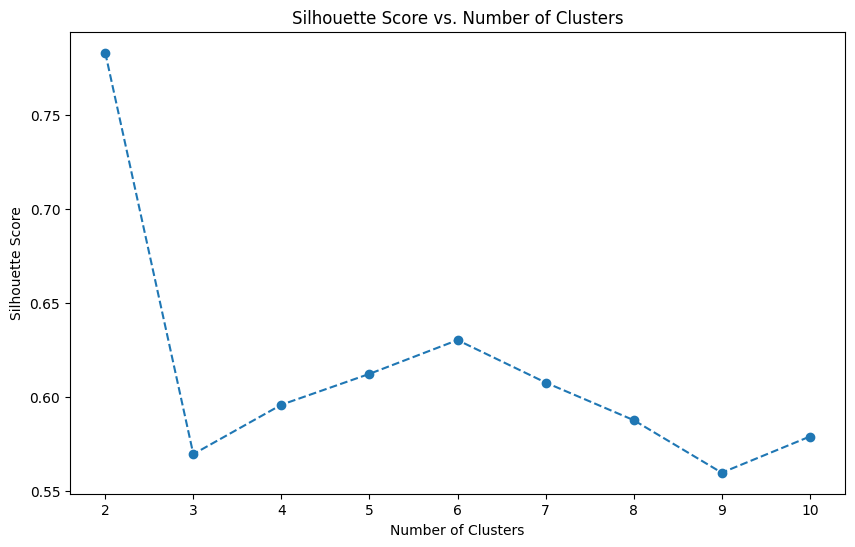

C:\Users\kosti\AppData\Local\Temp\ipykernel_25076\2700191581.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



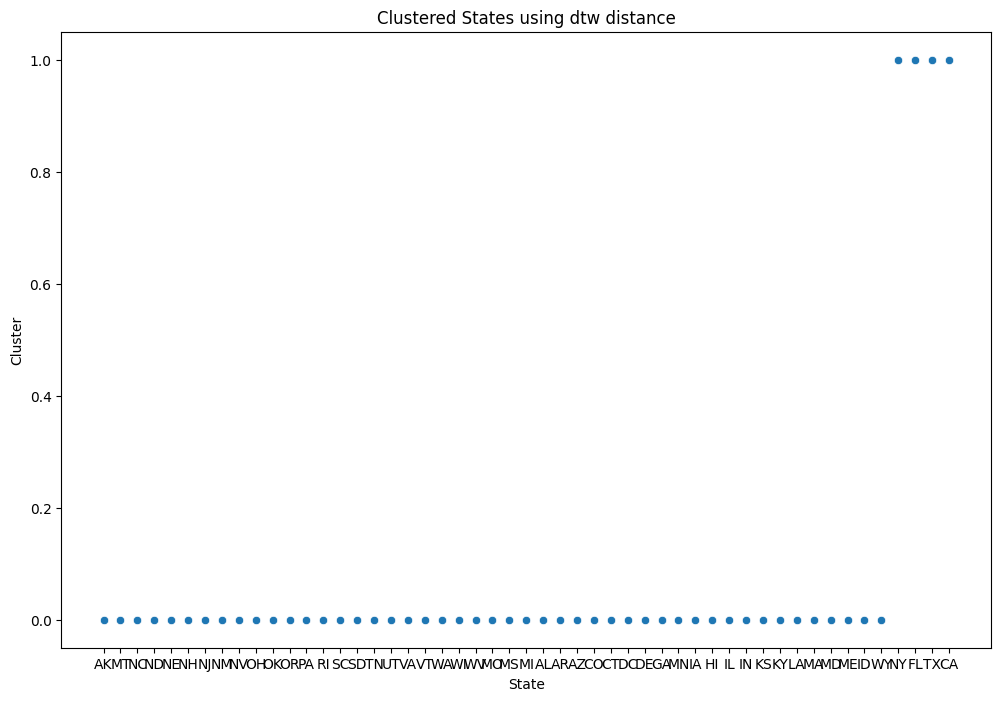

In [173]:
silly_plot(df, 'dtw', 'Residential Sales')

In [190]:
clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'dtw', 'Residential Sales')
silhouette_scores

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

[0.7828366904832775,
 0.5695317704147678,
 0.595768655171845,
 0.6121841698908477,
 0.6301282067543572,
 0.607570674072923,
 0.5875884648191071,
 0.5596489820647378,
 0.5788596373267013]

***Clusters Analysis Function***

In [156]:
def post_cluster_analysis(data, key_columns, similarity_metric):
    clustered_states, silhouette_scores, optimal_k = silly_clustering(df, similarity_metric, 'Residential Sales')
    # Merge cluster labels with the original feature data for analysis
    feature_data_with_clusters = data.merge(clustered_states, left_on='State', right_on='State')

    # Aggregate data to profile clusters
    cluster_profiles = feature_data_with_clusters.groupby('Cluster').agg({
        'Total Revenues': ['mean', 'median', 'std'],
        'Total Sales': ['mean', 'median', 'std'],
        'Total Price': ['mean', 'median', 'std']
    }).reset_index()

    # Flatten multi-index columns for clarity
    cluster_profiles.columns = ['_'.join(col).strip('_') for col in cluster_profiles.columns]

    # Visualization: Boxplots of Total Revenues, Sales, and Prices by Cluster
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='Total Revenues', data=feature_data_with_clusters)
    plt.title('Total Revenues by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Revenues')

    plt.subplot(1, 3, 2)
    sns.boxplot(x='Cluster', y='Total Sales', data=feature_data_with_clusters)
    plt.title('Total Sales by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Sales')

    plt.subplot(1, 3, 3)
    sns.boxplot(x='Cluster', y='Total Price', data=feature_data_with_clusters)
    plt.title('Total Prices by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Price')

    plt.tight_layout()
    plt.show()

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

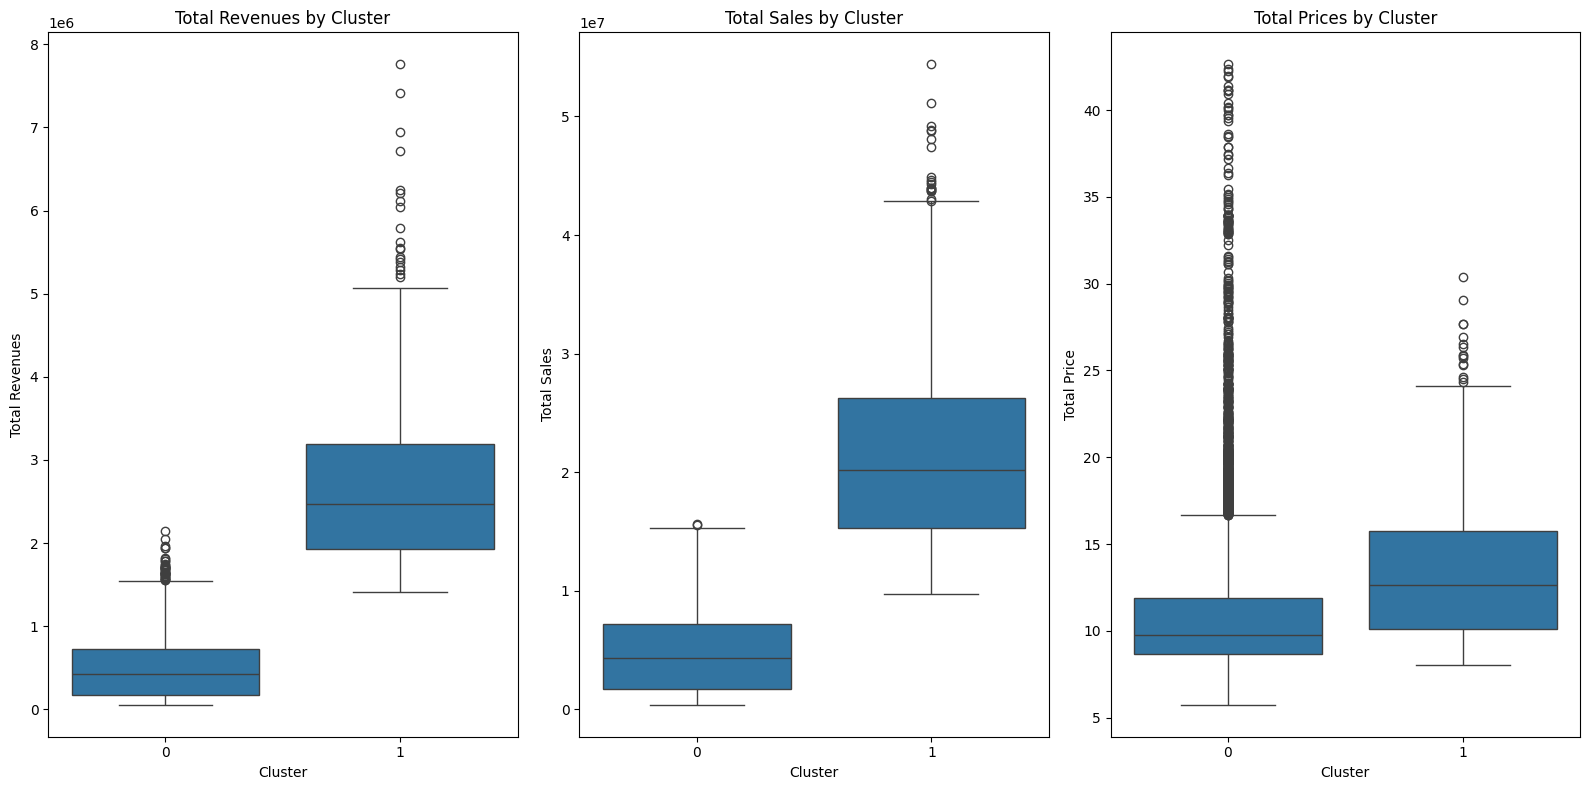

In [157]:
post_cluster_analysis(df, 'Residential Sales', 'dtw')

***Cluster Mapping Function***

In [158]:
import plotly.express as px

def cluster_map(data):
    # Ensure consistency with state abbreviations
    data['State'] = data['State'].str.upper()

    # Plotly choropleth map
    fig = px.choropleth(
        data_frame=data,
        locations='State',
        locationmode='USA-states',  # Use the state abbreviations
        color='Cluster',  # Color by the categorical variable
        scope='usa',  # Limit map to the United States
        color_discrete_map={0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'yellow'}  # Assign colors to clusters
    )

    fig.update_layout(
        title_text='US States Colored by Clusters',
        title_x=0.5,
        geo=dict(showframe=False, showcoastlines=False)
    )

    fig.show()

In [159]:
def cluster_map(data):
    # Ensure consistency with state abbreviations
    data['State'] = data['State'].str.upper()

    # Plotly choropleth map
    fig = px.choropleth(
        data_frame=data,
        locations='State',
        locationmode='USA-states',  # Use the state abbreviations
        color='Cluster',  # Color by the categorical variable
        scope='usa',  # Limit map to the United States
        color_discrete_map={0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'yellow'}  # Assign colors to clusters
    )

    fig.update_layout(
        title_text='US States Colored by Clusters',
        title_x=0.5,
        geo=dict(showframe=False, showcoastlines=False)
    )

    fig.show()

***Residential Analysis***

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

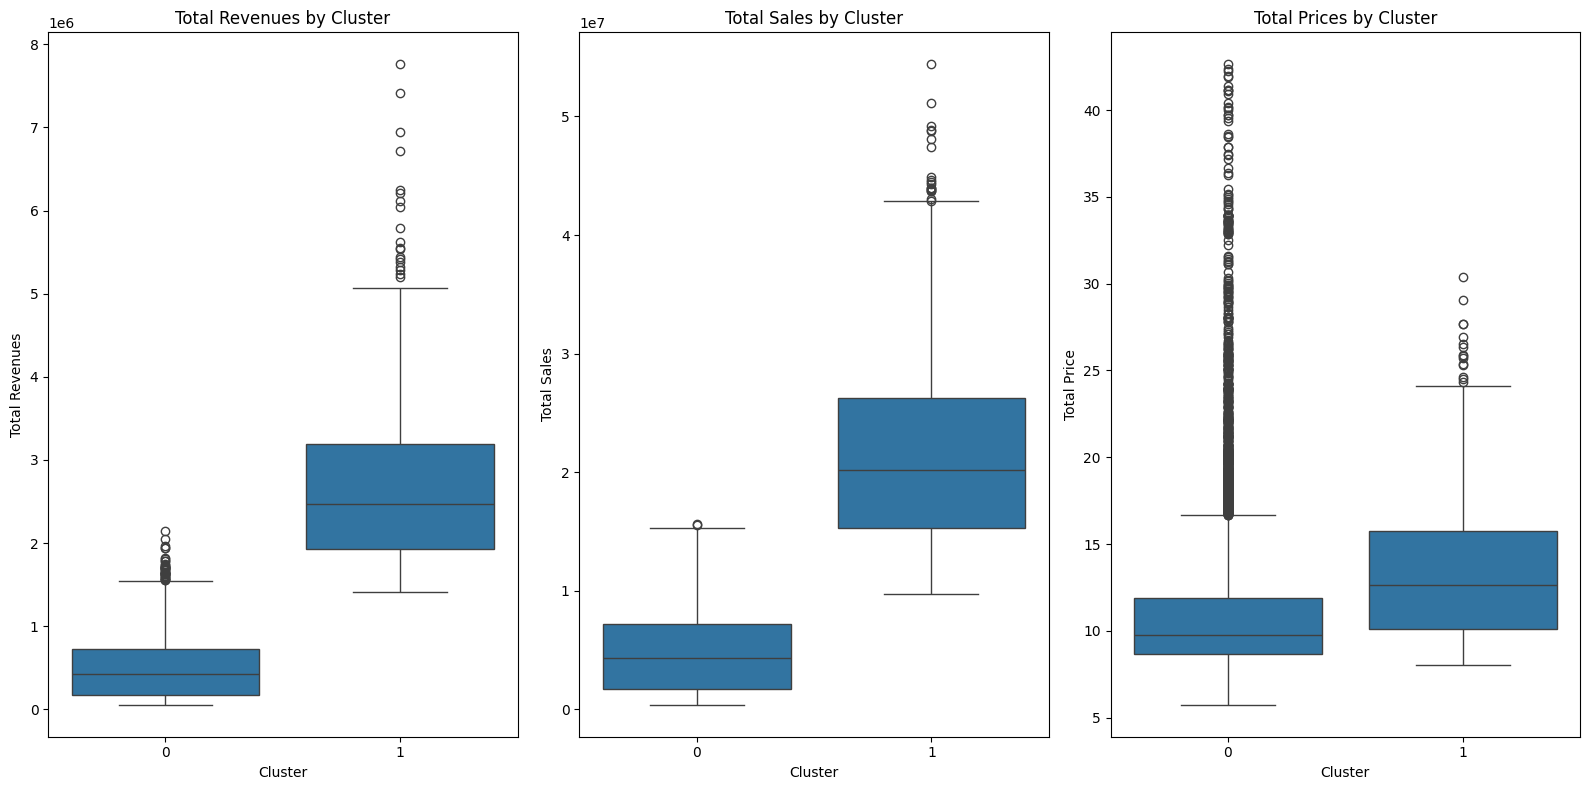

In [161]:
post_cluster_analysis(df, 'Residential Sales', 'dtw')

In [163]:
clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'dtw', 'Residential Sales')
cluster_map(clustered_states)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

We see that the optimal number of clusters is 2. We can see that the clusters are well separated and the silhouette score is 0.8. This is a good score. The 2 clusters formed are represented by the colors blue and yellow. The yellow cluster represents the big economy states that demand much more energy than the blue cluster. The yellow cluster contains 4 states California, Texas, New York, and Florida. The blue cluster represents the small economy states that demand less energy. The residuals analysis shows that the model is well fitted.

**Commercial Analysis**

In [117]:
data_prep('dtw', 'Commercial Sales', df)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
State,,,,,,,,,,,,,,,,,,,,,
AK,0.000000e+00,8.472336e+06,3.240753e+06,8.544697e+06,4.889553e+07,5.117624e+06,4.649162e+06,2.710944e+05,1.851054e+05,2.773796e+07,...,8.308042e+04,9.519346e+06,4.106271e+07,1.411222e+06,1.130716e+07,1.522297e+05,6.760977e+06,7.147155e+06,1.733308e+06,1.000982e+05
AL,8.472336e+06,0.000000e+00,4.081675e+06,1.368565e+06,4.049670e+07,1.970292e+06,2.292616e+06,8.148627e+06,8.277559e+06,1.889211e+07,...,8.374991e+06,9.070417e+05,3.264730e+07,6.676042e+06,1.666735e+06,8.784117e+06,1.257645e+06,1.036373e+06,6.552413e+06,8.270627e+06
AR,3.240753e+06,4.081675e+06,0.000000e+00,3.983055e+06,4.566933e+07,1.140673e+06,9.619563e+05,2.690707e+06,2.925130e+06,2.450591e+07,...,3.129180e+06,5.353099e+06,3.781160e+07,9.557757e+05,7.091543e+06,3.573084e+06,2.497212e+06,2.814901e+06,8.698397e+05,3.032784e+06
AZ,8.544697e+06,1.368565e+06,3.983055e+06,0.000000e+00,3.792533e+07,2.602619e+06,2.810433e+06,8.236931e+06,8.365875e+06,1.644544e+07,...,8.460630e+06,1.657375e+06,3.066957e+07,6.115637e+06,2.145013e+06,8.862870e+06,2.113096e+06,1.963833e+06,6.125338e+06,8.362537e+06
CA,4.889553e+07,4.049670e+07,4.566933e+07,3.792533e+07,0.000000e+00,4.382015e+07,4.434801e+07,4.858166e+07,4.871012e+07,1.478075e+07,...,4.879074e+07,3.925192e+07,6.490790e+06,4.723558e+07,3.642646e+07,4.920324e+07,4.222121e+07,4.189646e+07,4.706599e+07,4.869922e+07
CO,5.117624e+06,1.970292e+06,1.140673e+06,2.602619e+06,4.382015e+07,0.000000e+00,5.047633e+05,4.805089e+06,4.932377e+06,2.264834e+07,...,5.019441e+06,2.684655e+06,3.597186e+07,2.691400e+06,4.062616e+06,5.431827e+06,9.186348e+05,1.100114e+06,2.616654e+06,4.918048e+06
CT,4.649162e+06,2.292616e+06,9.619563e+05,2.810433e+06,4.434801e+07,5.047633e+05,0.000000e+00,4.335331e+06,4.460649e+06,2.314755e+07,...,4.556813e+06,3.200893e+06,3.647770e+07,2.390090e+06,4.773122e+06,4.964497e+06,1.070951e+06,1.293489e+06,2.258041e+06,4.450583e+06
DC,2.710944e+05,8.148627e+06,2.690707e+06,8.236931e+06,4.858166e+07,4.805089e+06,4.335331e+06,0.000000e+00,1.192765e+05,2.741475e+07,...,2.866953e+05,9.200906e+06,4.073898e+07,8.400400e+05,1.099746e+07,5.634462e+05,6.491470e+06,6.837300e+06,1.104434e+06,1.821044e+05
DE,1.851054e+05,8.277559e+06,2.925130e+06,8.365875e+06,4.871012e+07,4.932377e+06,4.460649e+06,1.192765e+05,0.000000e+00,2.754730e+07,...,1.833592e+05,9.326555e+06,4.086902e+07,1.031992e+06,1.112532e+07,4.187911e+05,6.612884e+06,6.964455e+06,1.329046e+06,1.455428e+05


c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

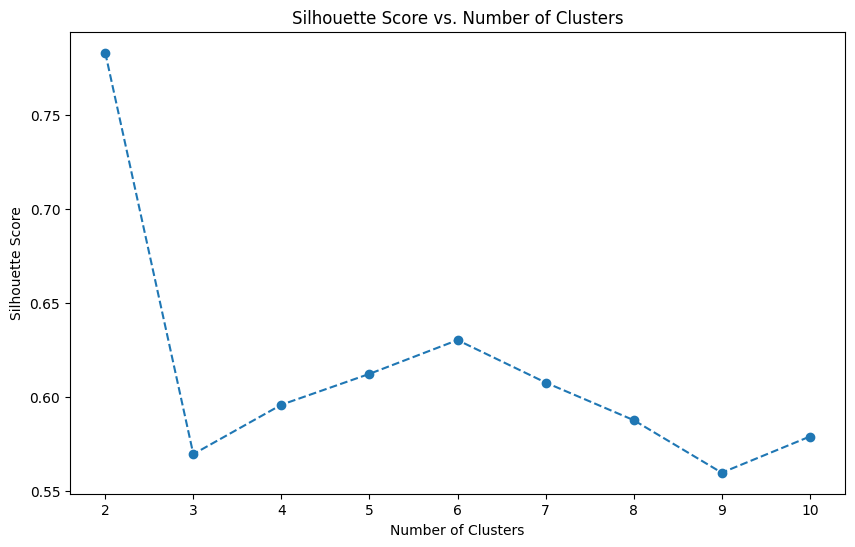

C:\Users\kosti\AppData\Local\Temp\ipykernel_25076\2700191581.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



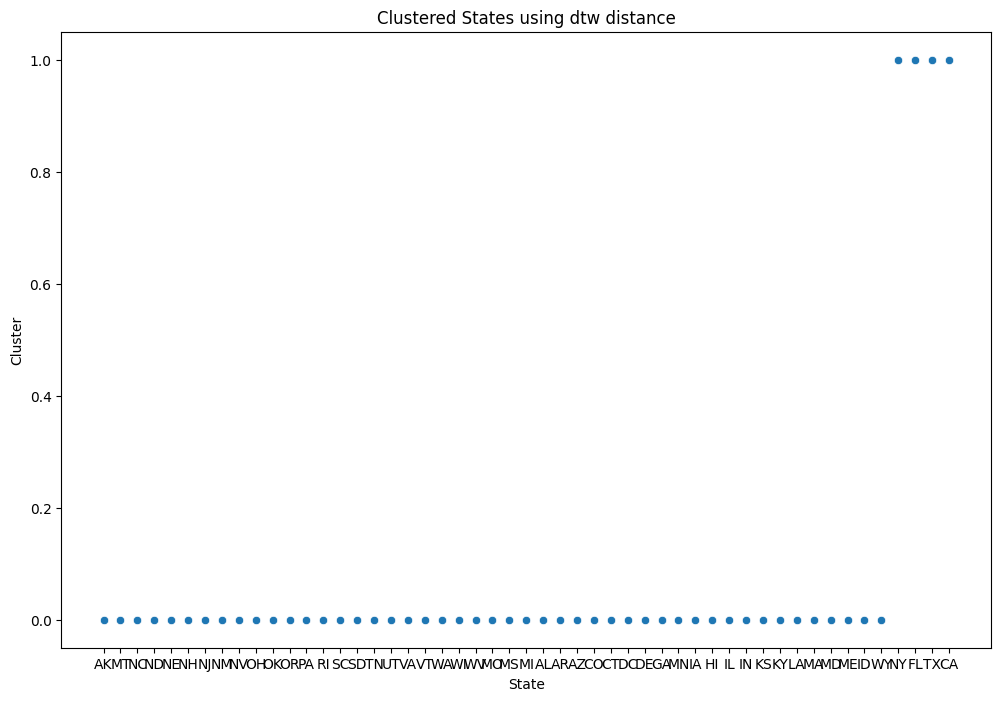

In [ ]:
silly_plot(df, 'dtw', 'Commercial Sales')


In [195]:
silly_clustering(df, 'dtw', 'Commercial Sales')

clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'euclidean', 'Residential Sales')
silhouette_scores

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

[0.7828366904832775,
 0.5695317704147678,
 0.595768655171845,
 0.6121841698908477,
 0.6301282067543572,
 0.607570674072923,
 0.5875884648191071,
 0.5596489820647378,
 0.5788596373267013]

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

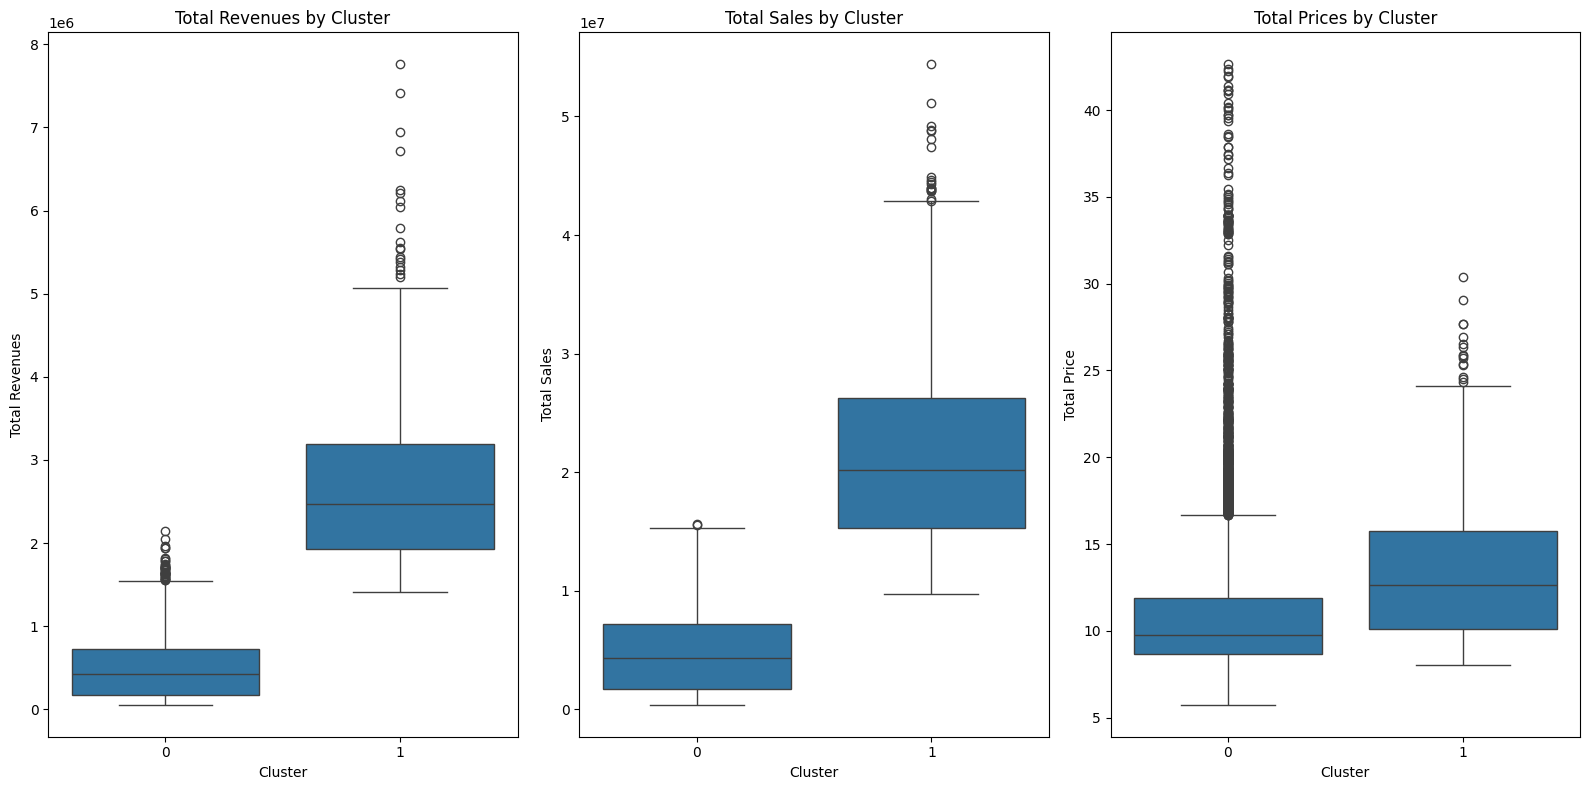

In [120]:
post_cluster_analysis(df, 'Commercial Sales', 'dtw')

In [121]:
clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'dtw', 'Commercial Sales')
cluster_map(clustered_states)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

For the commercial analysis we see similar results. The optimal number of clusters is 2. The silhouette score is 0.8. The clusters are well separated. The residuals analysis shows that the model is well fitted. The 2 clusters formed are represented by the colors blue and yellow. The yellow cluster represents the states that have a higher commercial energy demand and contains the same 4 states. The blue cluster represents the states that have a lower commercial energy demand.

***Industrial Analysis***

In [122]:
data_prep('dtw', 'Industrial Sales', df)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
State,,,,,,,,,,,,,,,,,,,,,
AK,0.000000e+00,8.472336e+06,3.240753e+06,8.544697e+06,4.889553e+07,5.117624e+06,4.649162e+06,2.710944e+05,1.851054e+05,2.773796e+07,...,8.308042e+04,9.519346e+06,4.106271e+07,1.411222e+06,1.130716e+07,1.522297e+05,6.760977e+06,7.147155e+06,1.733308e+06,1.000982e+05
AL,8.472336e+06,0.000000e+00,4.081675e+06,1.368565e+06,4.049670e+07,1.970292e+06,2.292616e+06,8.148627e+06,8.277559e+06,1.889211e+07,...,8.374991e+06,9.070417e+05,3.264730e+07,6.676042e+06,1.666735e+06,8.784117e+06,1.257645e+06,1.036373e+06,6.552413e+06,8.270627e+06
AR,3.240753e+06,4.081675e+06,0.000000e+00,3.983055e+06,4.566933e+07,1.140673e+06,9.619563e+05,2.690707e+06,2.925130e+06,2.450591e+07,...,3.129180e+06,5.353099e+06,3.781160e+07,9.557757e+05,7.091543e+06,3.573084e+06,2.497212e+06,2.814901e+06,8.698397e+05,3.032784e+06
AZ,8.544697e+06,1.368565e+06,3.983055e+06,0.000000e+00,3.792533e+07,2.602619e+06,2.810433e+06,8.236931e+06,8.365875e+06,1.644544e+07,...,8.460630e+06,1.657375e+06,3.066957e+07,6.115637e+06,2.145013e+06,8.862870e+06,2.113096e+06,1.963833e+06,6.125338e+06,8.362537e+06
CA,4.889553e+07,4.049670e+07,4.566933e+07,3.792533e+07,0.000000e+00,4.382015e+07,4.434801e+07,4.858166e+07,4.871012e+07,1.478075e+07,...,4.879074e+07,3.925192e+07,6.490790e+06,4.723558e+07,3.642646e+07,4.920324e+07,4.222121e+07,4.189646e+07,4.706599e+07,4.869922e+07
CO,5.117624e+06,1.970292e+06,1.140673e+06,2.602619e+06,4.382015e+07,0.000000e+00,5.047633e+05,4.805089e+06,4.932377e+06,2.264834e+07,...,5.019441e+06,2.684655e+06,3.597186e+07,2.691400e+06,4.062616e+06,5.431827e+06,9.186348e+05,1.100114e+06,2.616654e+06,4.918048e+06
CT,4.649162e+06,2.292616e+06,9.619563e+05,2.810433e+06,4.434801e+07,5.047633e+05,0.000000e+00,4.335331e+06,4.460649e+06,2.314755e+07,...,4.556813e+06,3.200893e+06,3.647770e+07,2.390090e+06,4.773122e+06,4.964497e+06,1.070951e+06,1.293489e+06,2.258041e+06,4.450583e+06
DC,2.710944e+05,8.148627e+06,2.690707e+06,8.236931e+06,4.858166e+07,4.805089e+06,4.335331e+06,0.000000e+00,1.192765e+05,2.741475e+07,...,2.866953e+05,9.200906e+06,4.073898e+07,8.400400e+05,1.099746e+07,5.634462e+05,6.491470e+06,6.837300e+06,1.104434e+06,1.821044e+05
DE,1.851054e+05,8.277559e+06,2.925130e+06,8.365875e+06,4.871012e+07,4.932377e+06,4.460649e+06,1.192765e+05,0.000000e+00,2.754730e+07,...,1.833592e+05,9.326555e+06,4.086902e+07,1.031992e+06,1.112532e+07,4.187911e+05,6.612884e+06,6.964455e+06,1.329046e+06,1.455428e+05


c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

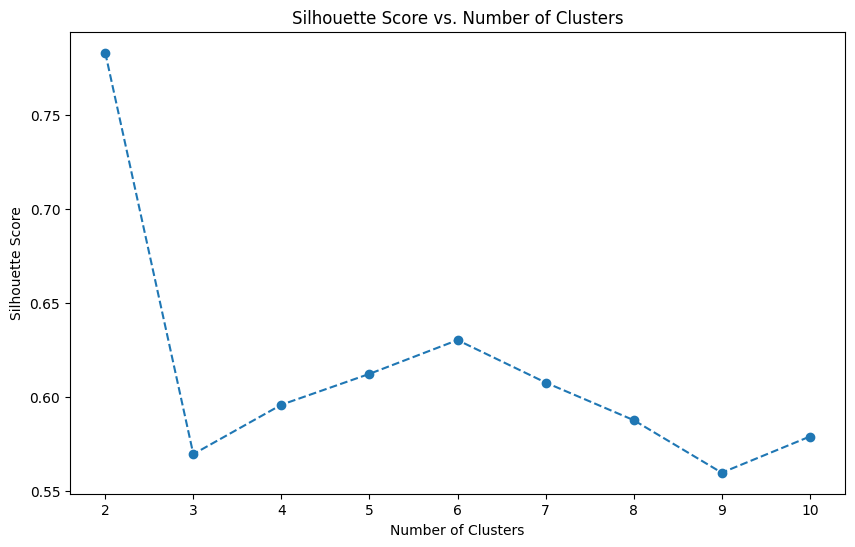

C:\Users\kosti\AppData\Local\Temp\ipykernel_25076\2700191581.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



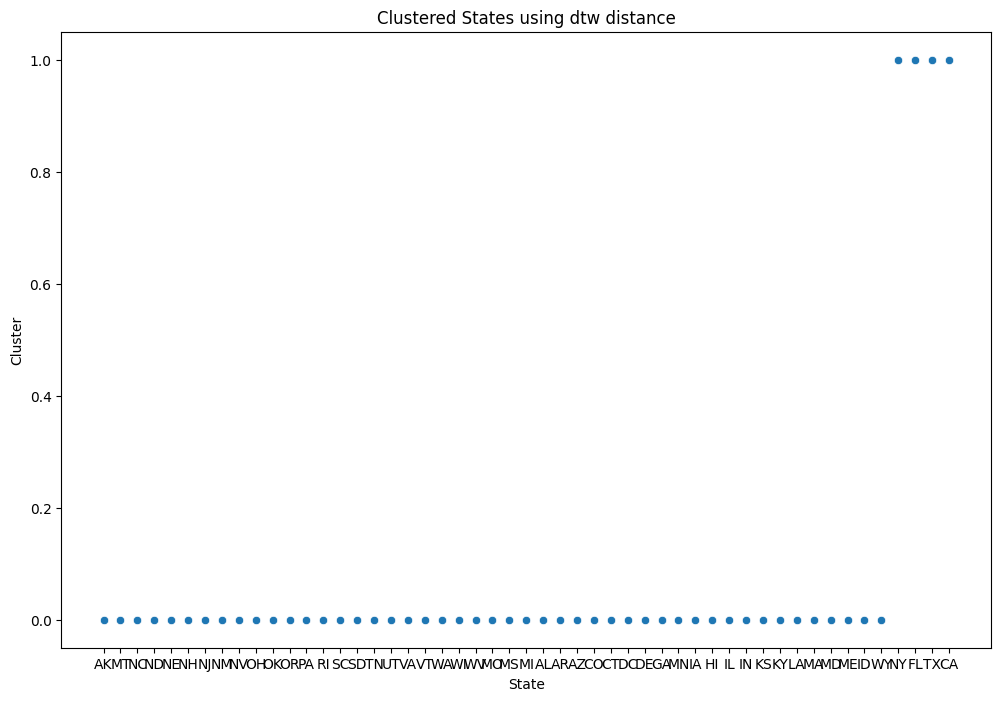

In [123]:
silly_plot(df, 'dtw', 'Industrial Sales')

In [124]:
silly_clustering(df, 'dtw', 'Industrial Sales')

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

(   State  Cluster
 0     AK        0
 26    MT        0
 27    NC        0
 28    ND        0
 29    NE        0
 30    NH        0
 31    NJ        0
 32    NM        0
 33    NV        0
 35    OH        0
 36    OK        0
 37    OR        0
 38    PA        0
 39    RI        0
 40    SC        0
 41    SD        0
 42    TN        0
 44    UT        0
 45    VA        0
 46    VT        0
 47    WA        0
 48    WI        0
 49    WV        0
 24    MO        0
 25    MS        0
 22    MI        0
 1     AL        0
 2     AR        0
 3     AZ        0
 5     CO        0
 6     CT        0
 7     DC        0
 8     DE        0
 10    GA        0
 23    MN        0
 12    IA        0
 11    HI        0
 14    IL        0
 15    IN        0
 16    KS        0
 17    KY        0
 18    LA        0
 19    MA        0
 20    MD        0
 21    ME        0
 13    ID        0
 50    WY        0
 34    NY        1
 9     FL        1
 43    TX        1
 4     CA        1,
 [0.7828366

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

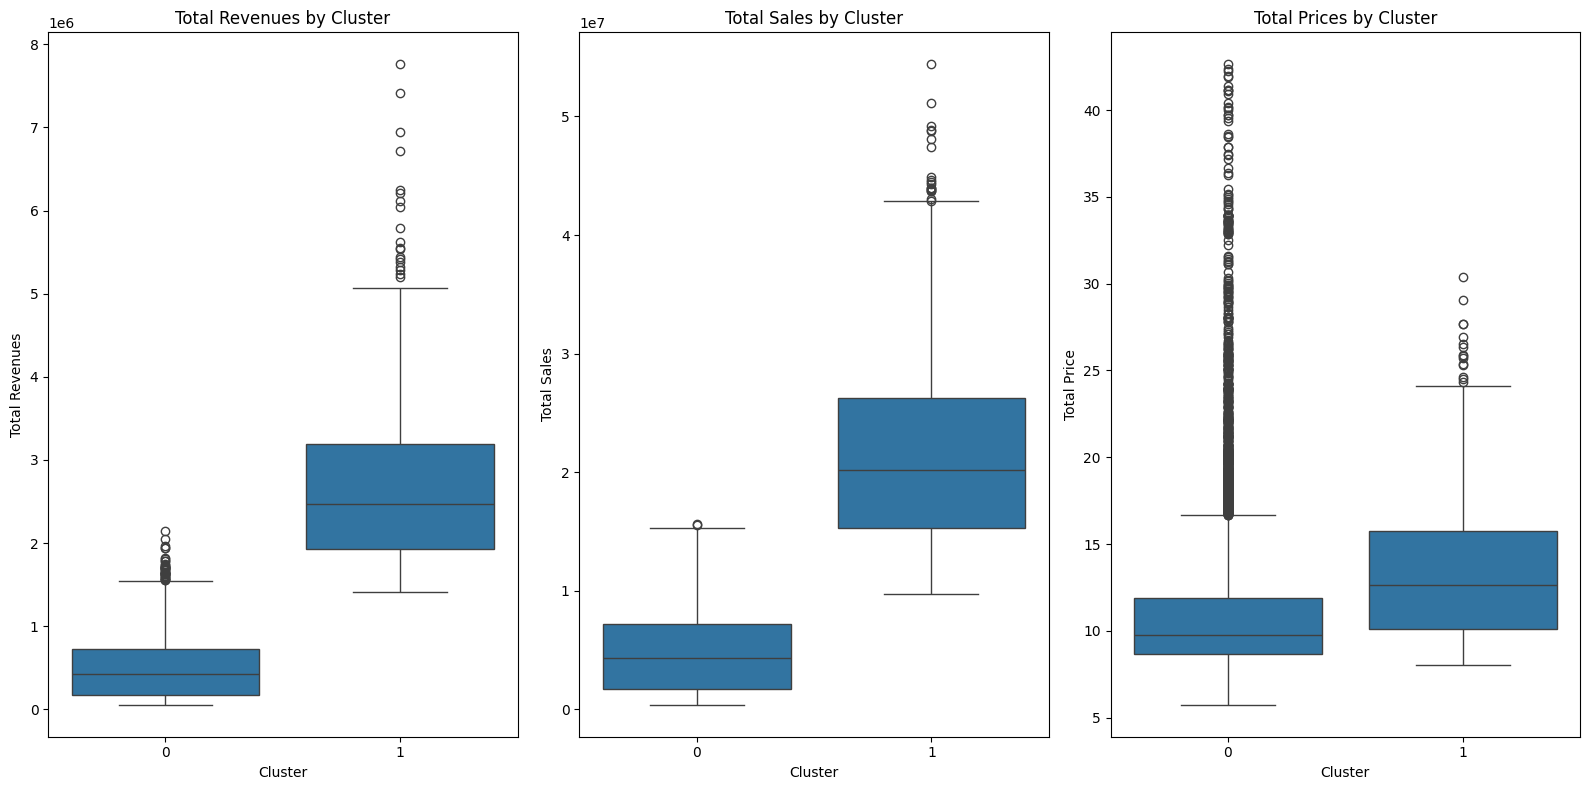

In [125]:
post_cluster_analysis(df, 'Industrial Sales', 'dtw')

In [150]:
clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'euclidean', 'Industrial Sales')
cluster_map(clustered_states)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

We see similar results for the industrial analysis. The optimal number of clusters is 2. The silhouette score is 0.8. The clusters are well separated. The residuals analysis shows that the model is well fitted. The 2 clusters formed are represented by the colors blue and yellow. The yellow cluster represents the states that have a higher industrial energy demand and contains the same 4 states. The blue cluster represents the states that have a lower industrial energy demand.

***Transportation Analysis***

In [164]:
silly_clustering(df, 'dtw', 'Transportation Sales')

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

(   State  Cluster
 0     AK        0
 26    MT        0
 27    NC        0
 28    ND        0
 29    NE        0
 30    NH        0
 31    NJ        0
 32    NM        0
 33    NV        0
 35    OH        0
 36    OK        0
 37    OR        0
 38    PA        0
 39    RI        0
 40    SC        0
 41    SD        0
 42    TN        0
 44    UT        0
 45    VA        0
 46    VT        0
 47    WA        0
 48    WI        0
 49    WV        0
 24    MO        0
 25    MS        0
 22    MI        0
 1     AL        0
 2     AR        0
 3     AZ        0
 5     CO        0
 6     CT        0
 7     DC        0
 8     DE        0
 10    GA        0
 23    MN        0
 12    IA        0
 11    HI        0
 14    IL        0
 15    IN        0
 16    KS        0
 17    KY        0
 18    LA        0
 19    MA        0
 20    MD        0
 21    ME        0
 13    ID        0
 50    WY        0
 34    NY        1
 9     FL        1
 43    TX        1
 4     CA        1,
 [0.7828366

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

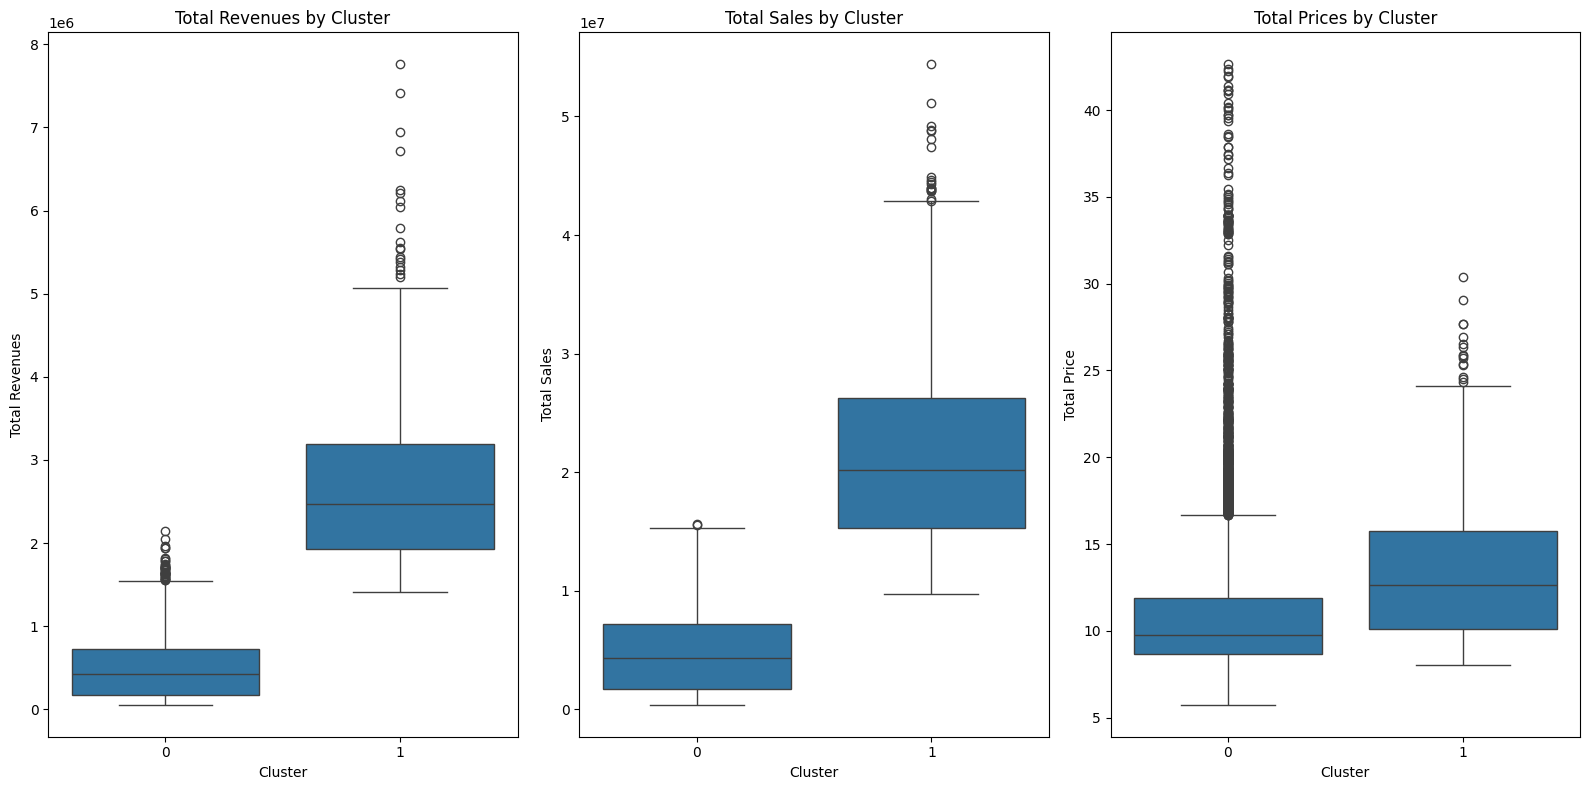

In [165]:
post_cluster_analysis(df, 'Transportation Sales', 'dtw')

In [166]:
clustered_states, silhouette_scores, optimal_k = silly_clustering(df, 'dtw', 'Transportation Sales')
cluster_map(clustered_states)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\kosti\OneDrive\Desktop\UMIC

Similar results are seen for the transportation analysis. The optimal number of clusters is 2. The silhouette score is 0.8. The clusters are well separated. The residuals analysis shows that the model is well fitted. The 2 clusters formed are represented by the colors blue and yellow. The yellow cluster represents the states that have a higher transportation energy demand and contains the same 4 states. The blue cluster represents the states that have a lower transportation energy demand.

Having the same 4 states in the yellow cluster for all the sectors shows that these states have a higher energy demand in all the sectors. This is expected as these states are the most populous states in the US. The states are California, Texas, New York, and Florida. This shows there is a correlation between the population of a state and the energy demand of the state. Also there is a correlation between the energy demand between all sectors. This is expected as the energy demand of a state is dependent on the population of the state and the economic activities in the state.

***Non-Optimal Clustering Functions***

In [132]:
def silly_clustering_non_optimal(data, similarity_metric, key_columns, k):
    # Prepare the data for clustering
    dtw_distance_df = data_prep(similarity_metric, key_columns, data)

    # Use the Euclidean distance matrix for clustering
    # Convert the matrix into a usable feature format for clustering
    numeric_features = dtw_distance_df.values

    # Apply K-Means with the specified number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_features)

    # Add cluster labels to the distance matrix for interpretation
    clustered_states = pd.DataFrame({
        'State': dtw_distance_df.index,
        'Cluster': cluster_labels
    }).sort_values(by='Cluster')

    return clustered_states

In [133]:
def post_cluster_analysis_non_optimal(data, key_columns, similarity_metric, k):
    clustered_states = silly_clustering_non_optimal(data, similarity_metric, key_columns, k)
    # Merge cluster labels with the original feature data for analysis
    feature_data_with_clusters = data.merge(clustered_states, left_on='State', right_on='State')

    # Aggregate data to profile clusters
    cluster_profiles = feature_data_with_clusters.groupby('Cluster').agg({
        'Total Revenues': ['mean', 'median', 'std'],
        'Total Sales': ['mean', 'median', 'std'],
        'Total Price': ['mean', 'median', 'std']
    }).reset_index()

    # Flatten multi-index columns for clarity
    cluster_profiles.columns = ['_'.join(col).strip('_') for col in cluster_profiles.columns]

    # Visualization: Boxplots of Total Revenues, Sales, and Prices by Cluster
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='Total Revenues', data=feature_data_with_clusters)
    plt.title('Total Revenues by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Revenues')

    plt.subplot(1, 3, 2)
    sns.boxplot(x='Cluster', y='Total Sales', data=feature_data_with_clusters)
    plt.title('Total Sales by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Sales')

    plt.subplot(1, 3, 3)
    sns.boxplot(x='Cluster', y='Total Price', data=feature_data_with_clusters)
    plt.title('Total Prices by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Price')

    plt.tight_layout()
    plt.show()

In [138]:
def cluster_map_non_optimal(clustered_states):
    # Ensure consistency with state abbreviations
    clustered_states['State'] = clustered_states['State'].str.upper()

    # Plotly choropleth map
    fig = px.choropleth(
        data_frame=clustered_states,
        locations='State',
        locationmode='USA-states',  # Use the state abbreviations
        color='Cluster',  # Color by the categorical variable
        scope='usa',  # Limit map to the United States
        color_discrete_map={0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'yellow'}  # Assign colors to clusters
    )

    fig.update_layout(
        title_text='US States Colored by Clusters',
        title_x=0.5,
        geo=dict(showframe=False, showcoastlines=False)
    )

    fig.show()

***Non-Optimal Clustering Analysis***

We saw before the optimal clustering for the 4 sectors. The results are not that interesting so lets see the non-optimal clustering for the 4 sectors. Although the silhouette score is not that good, the clusters are well separated and can provide further insights. The non-optimal clustering for the 4 sectors is shown below.

**Residential Analysis**

In [167]:
silly_clustering_non_optimal(df, 'dtw', 'Residential Sales', 3)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,State,Cluster
0,AK,0
46,VT,0
44,UT,0
41,SD,0
39,RI,0
37,OR,0
36,OK,0
33,NV,0
32,NM,0
30,NH,0


In [168]:
silly_clustering_non_optimal(df, 'dtw', 'Transportation Sales', 4)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,State,Cluster
15,IN,0
35,OH,0
27,NC,0
24,MO,0
23,MN,0
22,MI,0
38,PA,0
20,MD,0
19,MA,0
18,LA,0


c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



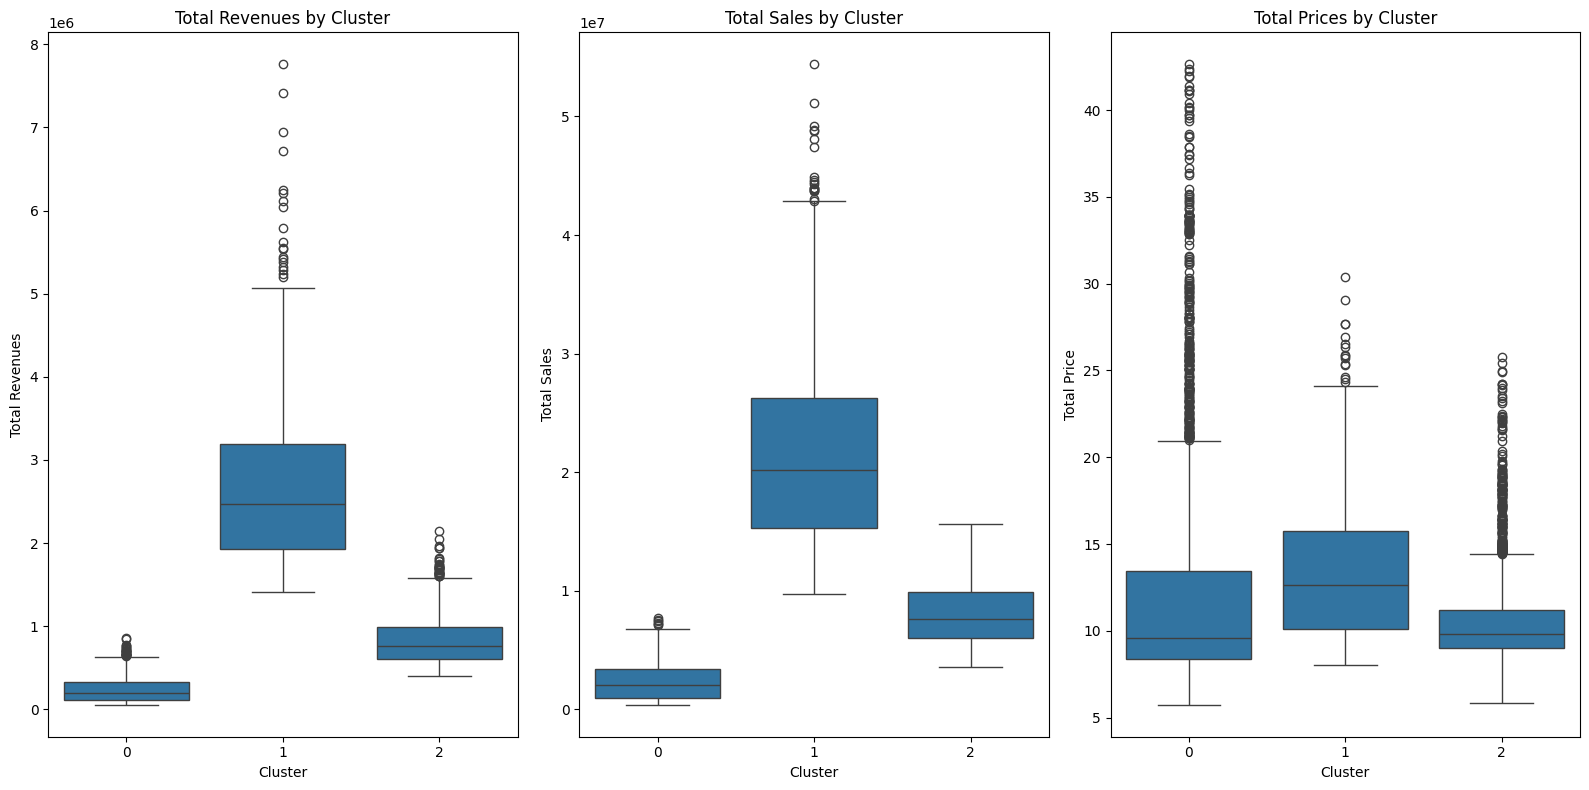

In [169]:
post_cluster_analysis_non_optimal(df, 'Transportation Sales', 'dtw', 3)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



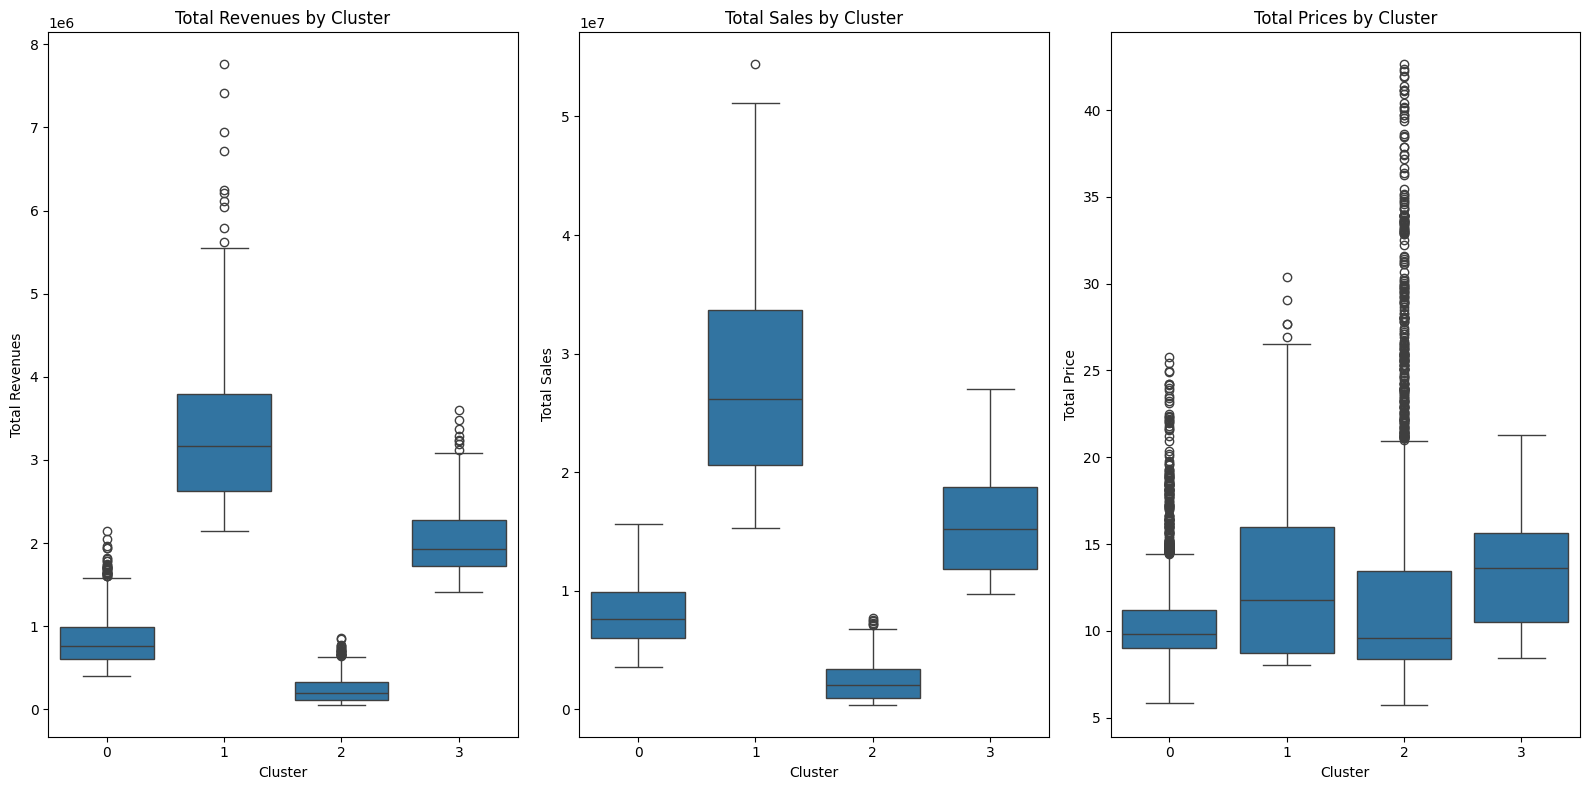

In [170]:
post_cluster_analysis_non_optimal(df, 'Transportation Sales', 'dtw', 4)

In [171]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Residential Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Here we see 3-means clustering of the residential energy demand. The 3 clusters formed are represented by the colors blue, yellow, and pink. The pink cluster represents the states that have a higher residential energy demand. The blue cluster represents the states that have a lower residential energy demand. The yellow cluster represents the states that have a medium residential energy demand. 

We still see the same 4 states in the pink cluster. The other two clusters follow geographical patterns. The blue cluster represents the states in the west and the yellow cluster represents the states in the east. This shows that the residential energy demand is dependent on the population of the state and the geographical location of the state.

There is a sillhouette score of 0.57. This is not the best score but the clusters are well separated.

In [172]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Residential Sales', 4))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



When choosing 4-means clusters we see 2 'rich' economy clusters that each contain 2 states. The other 2 clusters contain the rest of the states. The clusters are well separated and the silhouette score is 0.6.

**Commercial Analysis**

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



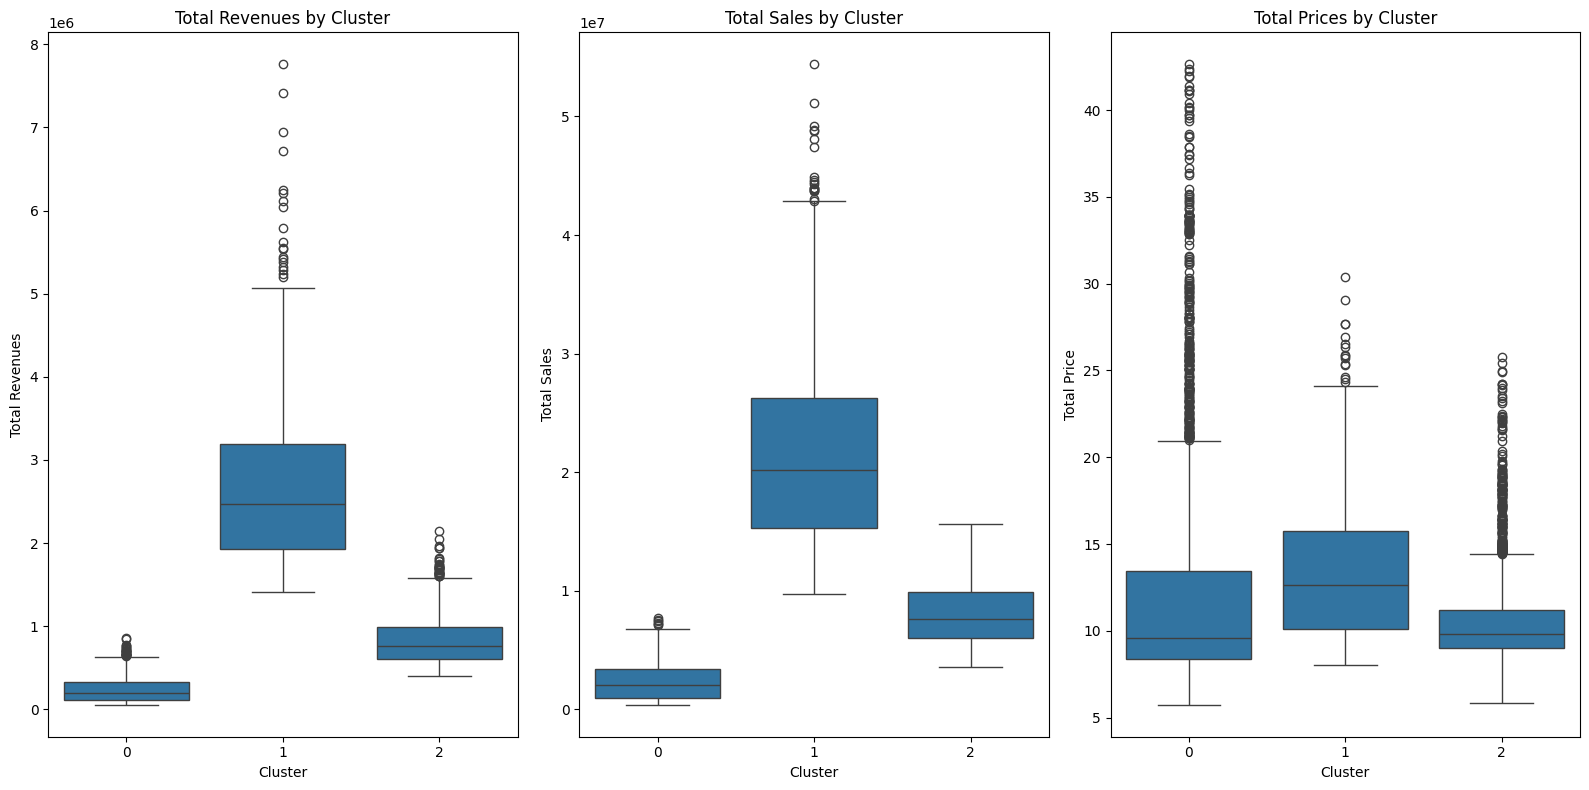

In [174]:
post_cluster_analysis_non_optimal(df, 'Commercial Sales', 'dtw', 3)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



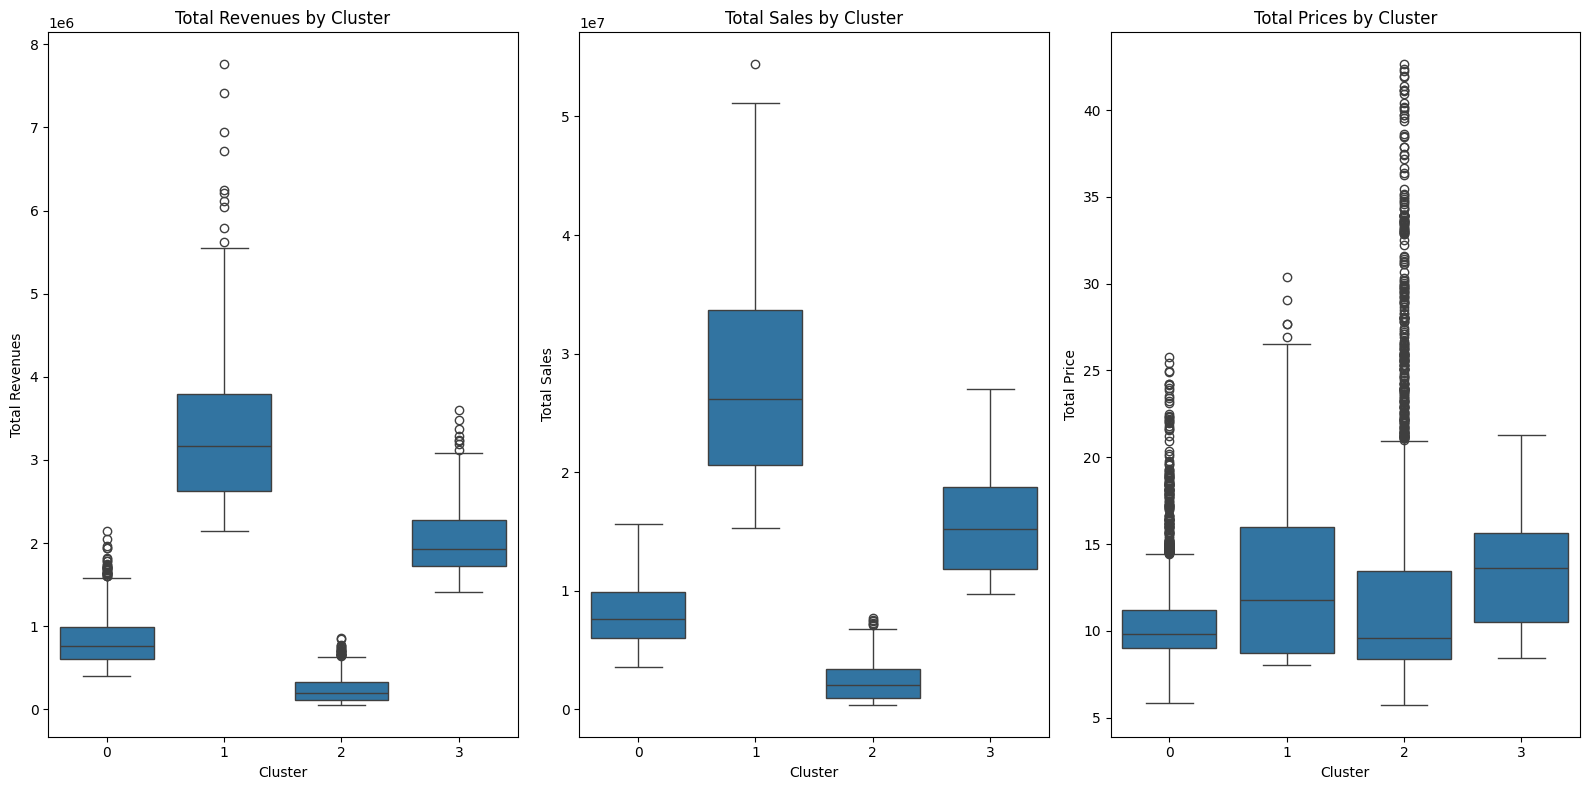

In [175]:
post_cluster_analysis_non_optimal(df, 'Commercial Sales', 'dtw', 4)

In [176]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Commercial Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [188]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Commercial Sales', 4))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The clustering patterns for the commercial energy demand are similar to the residential energy demand. The 3 clusters formed are represented by the colors blue, yellow, and pink. The pink cluster represents the states that have a higher commercial energy demand. The blue cluster represents the states that have a lower commercial energy demand. The yellow cluster represents the states that have a medium commercial energy demand.

This indicates that the commercial energy demand is dependent on the population of the state and the geographical location of the state. The sillhouette score is 0.6. This is not the best score but the clusters are well separated.

When choosing 4-means clusters we see 2 'rich' economy clusters that each contain 2 states. The other 2 clusters contain the rest of the states. The clusters are well separated and the silhouette score is 0.6.

**Industrial Analysis**

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



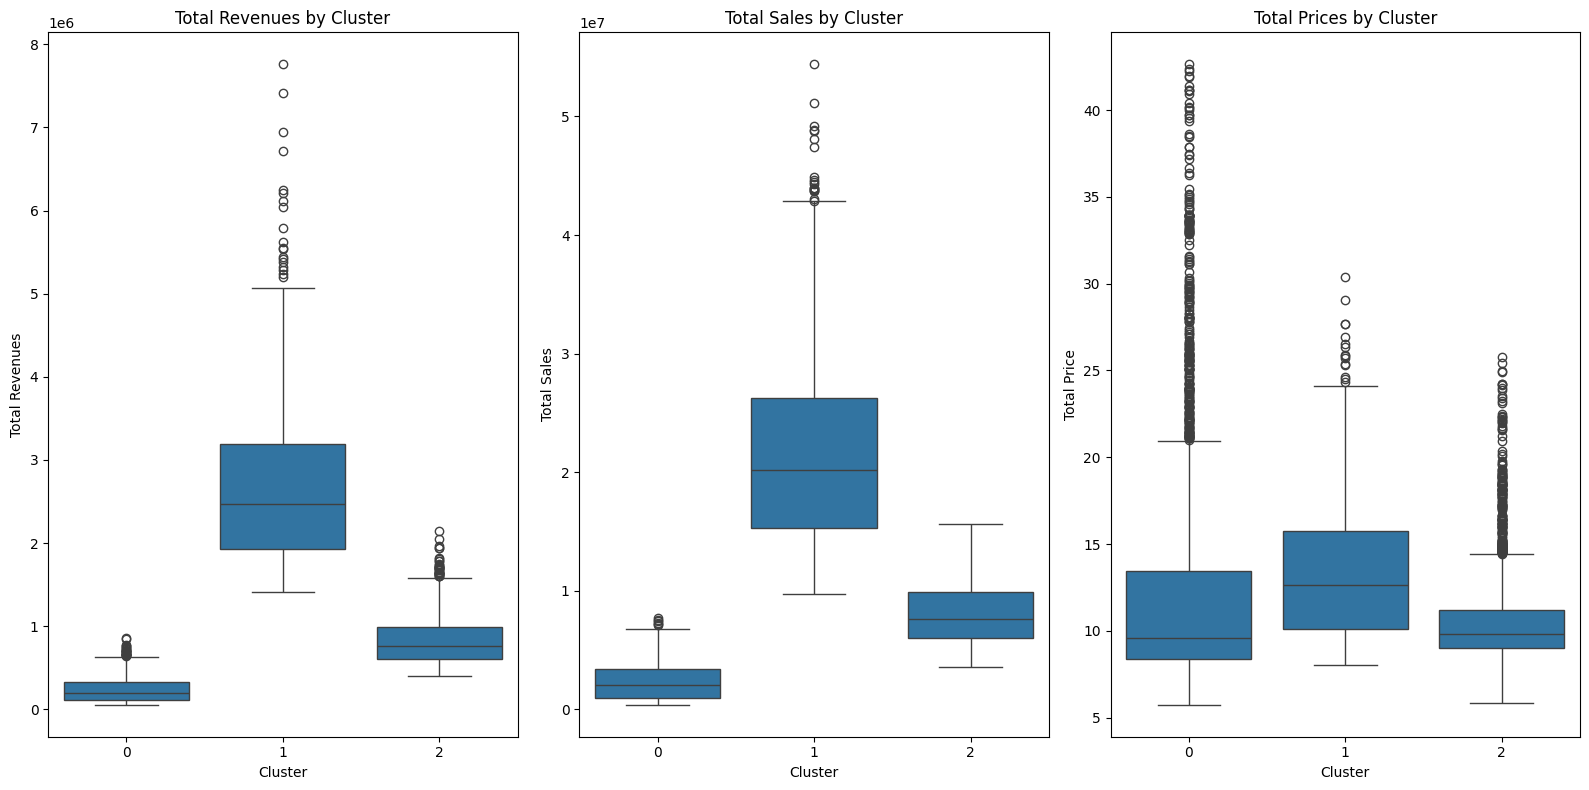

In [179]:
post_cluster_analysis_non_optimal(df, 'Industrial Sales', 'dtw', 3)

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



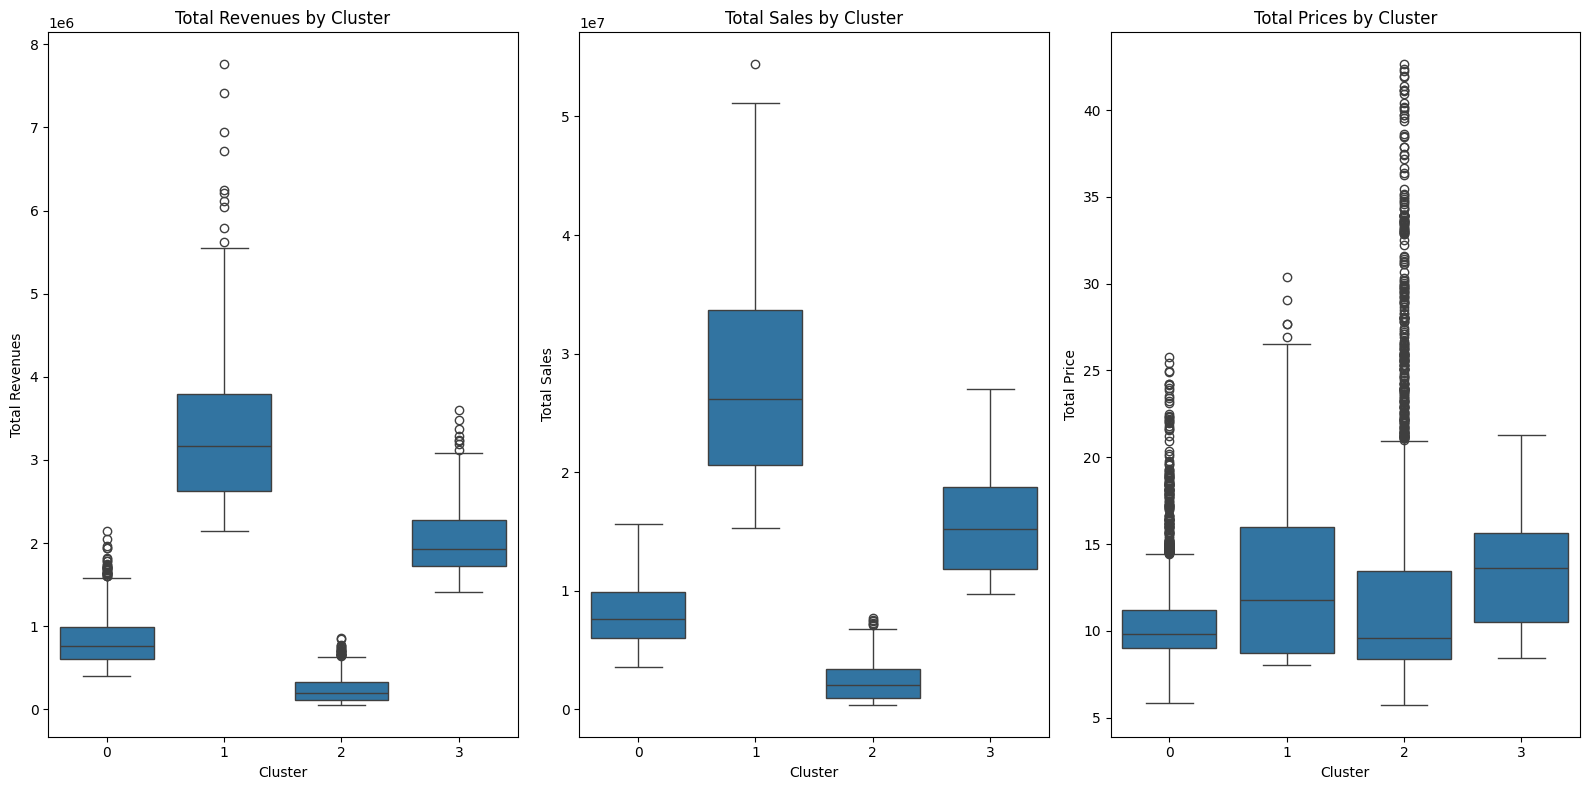

In [180]:
post_cluster_analysis_non_optimal(df, 'Industrial Sales', 'dtw', 4)

In [181]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Industrial Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [182]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Industrial Sales', 4))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



We again see the same patterns for the industrial energy demand. This indicates there is strong correlation accross sectors.

**Transportation Analysis**

In [183]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'euclidean', 'Transportation Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [184]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Transportation Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [145]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'euclidean', 'Industrial Sales', 3))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [186]:
cluster_map_non_optimal(silly_clustering_non_optimal(df, 'dtw', 'Transportation Sales', 4))

c:\Users\kosti\OneDrive\Desktop\UMICH\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



***Overall Conclusions***

Overall we see many similarities between the sectors. The energy demand of a state is dependent on the population of the state and the economic activities in the state. The 4 states California, Texas, New York, and Florida have the highest energy demand in all the sectors. This is expected as these states are the most populous states in the US. The clustering patterns for the 4 sectors are similar. The clustering patterns are dependent on the population of the state and the geographical location of the state. The clustering patterns are well separated and the silhouette scores are good. The clustering patterns can provide further insights into understanding the energy demand of a state.

Additioanlly, we did not see any differences in clustering when using different similarity measures. The clustering patterns are the same. This shows that the clustering patterns are robust and do not depend on the similarity measure used.

In terms of clustering we see there is high correlation between the energy demand of a state in all the sectors. This is expected as the energy demand of a state is dependent on the population of the state and the economic activities in the state. We also see that price is not as affected by the energy demand of a state. The price of energy is dependent on the economic activities in the state. The price of energy is higher in the states that have higher economic activities. The price of energy is lower in the states that have lower economic activities. The price of energy is not dependent on the population of the state. The price of energy is not dependent on the energy demand of the state.